The value at 3 by rk4 step halving method is
1.7720454615752008
The value at 3 by the Runge Kutta Fehlberg method is
2.1672509020742563
None


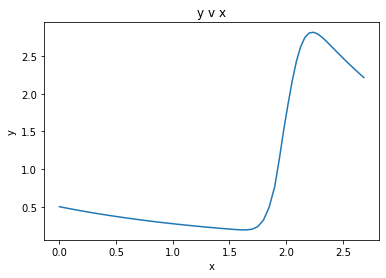

In [2]:
import math
import matplotlib.pyplot as plt
#Step Halving method for comparison
def rk4half(f,x1,x2,y,h,e):
    if x2<x1:
        h = -1*h
    k = math.floor((x2-x1)/h)
    for i in range(k):
        k1 = h*f(x1,y)
        k2 = h*f(x1+ 0.5*h,y + 0.5*k1)
        k3 = h*f(x1+ 0.5*h,y + 0.5*k2)
        k4 = h*f(x1+ h,y + k3)
        c = y
        y = y + (k1 + 2*k2 + 2*k3 + k4)/6
        for j in range(2):
            k1 = h*f(x1,y)/2
            k2 = h*f(x1+ 0.5*h,y + 0.5*k1)/2
            k3 = h*f(x1+ 0.5*h,y + 0.5*k2)/2
            k4 = h*f(x1+ h,y + k3)/2
            c = c + (k1 + 2*k2 + 2*k3 + k4)/6
        if abs(y-c)>abs(e):
            y + (y-c)/15
        x1 = x1 + h
    return y

#Runge-Kutta-Fehlberg Method 
def rkf4(f,x1,x2,y,h,e):
    if x2<x1:
        h = -1*h
    k = math.floor((x2-x1)/h)
    for i in range(k):
        k1 = h*f(x1,y)
        k2 = h*f(x1+ 2/9*h,y + 2/9*k1)
        k3 = h*f(x1+ 1/3*h,y + 1/12*k1 + 1/4*k2)
        k4 = h*f(x1+ 3/4*h,y + 69/128*k1 - 243/128*k2 + 135/64*k3)
        k5 = h*f(x1 + h, y - 17/12*k1 + 27/4*k2 -27/5*k3 + 16/15*k4)
        k6 = h*f(x1 + 5/6*h, y + 65/432*k1 -5/6*k2 + 13/16*k3 + 4/27*k4 + 5/144*k5)
        y = y + (47/450*k1 + 12/25*k3 + 32/225*k4 +1/30*k5 + 6/25*k6)
        te = abs(-1/150*k1 + 3/100*k3 - 16/75*k4 - 1/20*k5 + 6/25*k6)
        if te>abs(e):
            h = 0.9*h*math.pow(e/te,0.2)
        x1 = x1 + h
    return y
#To make Plots
def rk4graph(f,x1,x2,y,h,e):
    if x2<x1:
        h = -1*h
    u = []
    x = []
    k = math.floor((x2-x1)/h)
    for i in range(k):
        u.append(y)
        x.append(x1)
        k1 = h*f(x1,y)
        k2 = h*f(x1+ 2/9*h,y + 2/9*k1)
        k3 = h*f(x1+ 1/3*h,y + 1/12*k1 + 1/4*k2)
        k4 = h*f(x1+ 3/4*h,y + 69/128*k1 - 243/128*k2 + 135/64*k3)
        k5 = h*f(x1 + h, y - 17/12*k1 + 27/4*k2 -27/5*k3 + 16/15*k4)
        k6 = h*f(x1 + 5/6*h, y + 65/432*k1 -5/6*k2 + 13/16*k3 + 4/27*k4 + 5/144*k5)
        y = y + (47/450*k1 + 12/25*k3 + 32/225*k4 +1/30*k5 + 6/25*k6)
        te = abs(-1/150*k1 + 3/100*k3 - 16/75*k4 - 1/20*k5 + 6/25*k6)
        if te>abs(e):
            h = 0.9*h*math.pow(e/te,0.2)
        x1 = x1 + h
    plt.plot(x,u) 
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("y v x")
def f1(x,y):
    return -0.6*y + 10*pow(math.e,-(x-2)**2/0.03)
print("The value at 3 by rk4 step halving method is")
print(rk4half(f1,0,3,0.5,0.05,0.001))
print("The value at 3 by the Runge Kutta Fehlberg method is")
print(rkf4(f1,0,3,0.5,0.05,0.001))
print(rk4graph(f1,0,3,0.5,0.05,0.001))